In [1]:
from DataAcq.DataAcquisition import DataAcquisition
from DataNorm.DataNormalization import DataNormalization
from Plot.DataPlotter import DataPlotter
from DataClean.DataCleaning import DataCleaning
from model.model import CNNClassifier

from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
# Définir le chemin de stockage pour les données
file_path = "C:\\Users\\USER\\OneDrive\\Bureau\\github\\vibro\\0D.csv"

loaded_data = DataAcquisition.load_data(file_path)

In [7]:
# Usage Example:
try:
    data = loaded_data.iloc[24000000:]
    labels=data.iloc[:,0]
    data=data.iloc[:,1:5]    
    normalized_data = DataNormalization(method='MSD').fit_transform(data)
except ValueError as ve:
    print(ve)
except Exception as e:
    print("An error occurred:", e)

print(normalized_data)
print (data)
labels=labels.to_numpy()
print(loaded_data)


[[-5.22150921e-01 -1.14030188e+00  2.00553010e+00 -4.55899791e-01]
 [-5.22150921e-01  9.37447279e-01 -6.22005358e-01 -1.24596075e+00]
 [-5.22150921e-01  1.59165600e+00 -1.42796510e+00 -1.70427228e+00]
 ...
 [-7.65628292e+00  1.80343881e-02  1.08496638e-02  6.51327647e-02]
 [-7.65628292e+00  1.87781824e-02  3.13858381e-03  1.65239590e-02]
 [-7.65628292e+00  2.41469961e-03  1.00603410e-02 -4.53238059e-03]]
          Measured_RPM  Vibration_1  Vibration_2  Vibration_3
24000000    2059.02550    -0.015743     0.040058     0.000284
24000001    2059.02550     0.014228    -0.011530    -0.003921
24000002    2059.02550     0.023664    -0.027354    -0.006360
24000003    2059.02550    -0.039741     0.046192     0.006880
24000004    2059.02550     0.005262    -0.007758     0.000144
...                ...          ...          ...          ...
26423290     643.38338     0.001339     0.000769     0.003015
26423291     643.38338     0.001261     0.000952     0.003138
26423292     643.38338     0.00096

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Charger les données
df = loaded_data
# Sélectionner les caractéristiques et la cible
X = df[['V_in']]  # Variables explicatives (ici une seule colonne V_in)
y1 = df['Vibration_1']  # Première variable dépendante
y2 = df['Vibration_2']  # Deuxième variable dépendante
y3 = df['Vibration_3']  # Troisième variable dépendante

# Diviser les données en ensembles d'entraînement et de test pour chaque variable de vibration
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

# Créer et entraîner les modèles de régression linéaire pour chaque variable de vibration
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

model1.fit(X_train, y1_train)
model2.fit(X_train, y2_train)
model3.fit(X_train, y3_train)

# Faire des prédictions sur les ensembles de test
y1_pred = model1.predict(X_test)
y2_pred = model2.predict(X_test)
y3_pred = model3.predict(X_test)

# Évaluer les modèles
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
mse3 = mean_squared_error(y3_test, y3_pred)

print(f'MSE for Vibration_1: {mse1}')
print(f'MSE for Vibration_2: {mse2}')
print(f'MSE for Vibration_3: {mse3}')


MSE for Vibration_1: 0.0038154690753470235
MSE for Vibration_2: 0.007305320951257443
MSE for Vibration_3: 0.004212703285025127


In [46]:
y1_pred.reshape(5284659,1)

array([[ 0.0058942 ],
       [ 0.00491493],
       [-0.002854  ],
       ...,
       [ 0.00230352],
       [ 0.00537192],
       [ 0.00498021]])

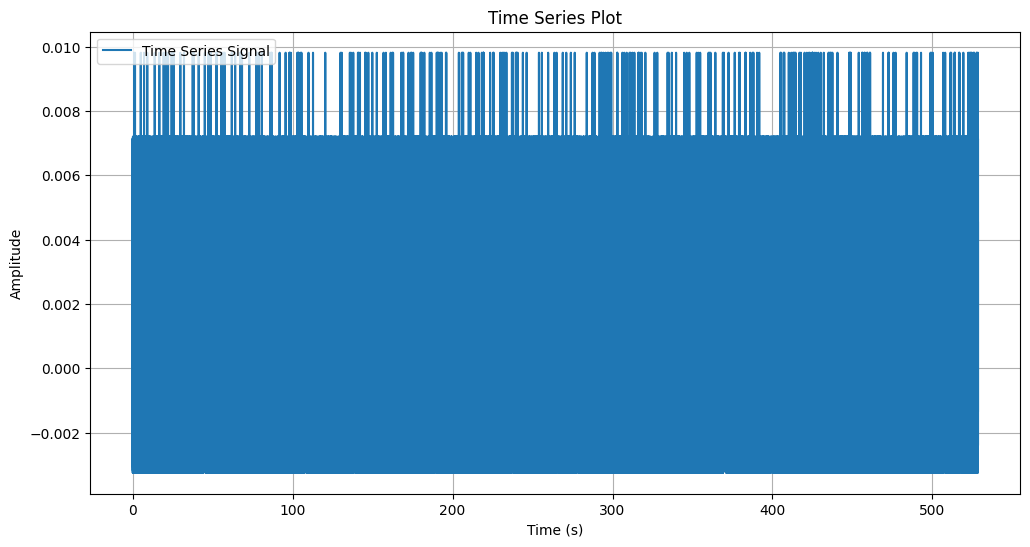

In [47]:
plotter = DataPlotter(y1_pred.reshape(5284659,1), 1000)
plotter.plot_series(0, percentage=10)

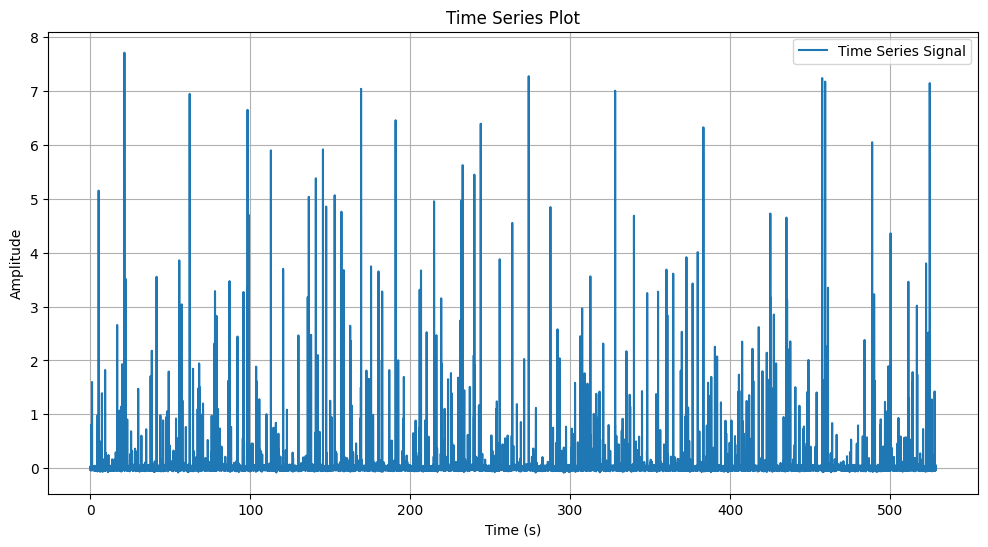

In [50]:
plotter = DataPlotter(np.array(y1_test).reshape(5284659,1), 1000)
plotter.plot_series(0, percentage=10)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, labels, test_size=0.2, random_state=42)

input_shape = X_train.shape[1]
num_classes = np.unique(labels).shape[0]

classifier = CNNClassifier(input_shape=input_shape, num_classes=num_classes)
classifier.train(X_train, y_train, X_test, y_test)
score = classifier.evaluate(X_test, y_test)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Saving and loading the model
model_filepath = 'best_model.h5'
classifier.train(X_train, y_train, X_test, y_test, model_filepath=model_filepath)
classifier.load(model_filepath)
# Further evaluation or inference can be done here

ValueError: The last dimension of the inputs to a Dense layer should be defined. Found None. Full input shape received: (None, None)